# Lab | Clustering songs

Clustering songs using DBSCAN and KMEANS methods. 

In [ ]:
#%pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# #read in files and add H or N 
# hot = pd.read_csv('/Users/deborahhaar/Desktop/ironhack-work/Week_6/Day_2/lab-spotify-api/data/hot_with_features.csv')
# hot['dataset'] = 'H'

# not_hot = pd.read_csv('/Users/deborahhaar/Desktop/ironhack-work/Week_6/Day_1/lab-not-hot-songs/not_hot_with_features.csv')
# not_hot['dataset'] = 'N'

# #concat files
# all_songs = pd.concat([hot, not_hot], axis = 0)

# #save csv
# all_songs.to_csv('all_songs.csv', index = False)

# DBSCAN

## Getting data

In [3]:
all_songs = pd.read_csv('all_songs.csv')

In [4]:
all_songs.head()

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset
0,3k79jB4aGmMDUQzEwa46Rz,Vampire,Olivia Rodrigo,0.511,0.532,0.1690,0.000000,137.827,H
1,59uQI0PADDKeE6UZDTJEe8,Last Night,Morgan Wallen,0.517,0.675,0.4590,0.000000,203.853,H
2,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Luke Combs,0.712,0.603,0.1860,0.000000,97.994,H
3,0WtM2NBVQNNJLh6scP13H8,Calm Down,Rema & Selena Gomez,0.801,0.806,0.3820,0.000669,106.999,H
4,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0.0632,0.000005,117.999,H


In [5]:
features = all_songs[['danceability', 'energy', 'acousticness', 'instrumentalness', 'tempo']]

In [6]:
features.head()

,danceability,energy,acousticness,instrumentalness,tempo
0,0.511,0.532,0.1690,0.000000,137.827
1,0.517,0.675,0.4590,0.000000,203.853
2,0.712,0.603,0.1860,0.000000,97.994
3,0.801,0.806,0.3820,0.000669,106.999
4,0.707,0.681,0.0632,0.000005,117.999


## Scale features and then model

In [7]:
scaler = StandardScaler()
scaler.fit(features)
X_scaled_np = scaler.transform(features)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=features.columns)

model = DBSCAN(min_samples=10) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
yhat = model.fit_predict(X_scaled_df)

In [8]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  -0.04


In [9]:
features['cluster'] = yhat

/var/folders/4v/8q8s246j5t5_2qhs0c6ssd2m0000gn/T/ipykernel_22954/631904484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = yhat


In [10]:
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4,  5])

## Fine Tuning

### Step 1

Compute the distance matrix between all the observations

In [11]:
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)

[[0.         2.33567616 1.69037107 ... 1.79253096 2.00790071 1.49699361]
 [2.33567616 0.         3.67905051 ... 3.91067948 3.5921882  2.71476179]
 [1.69037107 3.67905051 0.         ... 0.97318125 1.31072531 2.35720364]
 ...
 [1.79253096 3.91067948 0.97318125 ... 0.         1.57884897 2.23102879]
 [2.00790071 3.5921882  1.31072531 ... 1.57884897 0.         3.10717464]
 [1.49699361 2.71476179 2.35720364 ... 2.23102879 3.10717464 0.        ]]


### Step 2

Sort the matrix by row and ignore the first element as it is the distance between every point and itself (ie 0)

In [12]:
d2 = np.sort(d)[:,1:]
print(d2)

[[0.20177759 0.31841806 0.35068299 ... 5.59051469 5.6160334  5.72519607]
 [0.69899208 0.74168947 0.78300809 ... 7.63731237 7.65501124 7.68517333]
 [0.25705364 0.29542546 0.32029051 ... 5.37404503 5.38414031 5.47236136]
 ...
 [0.22001974 0.23316568 0.26468121 ... 5.05641645 5.12060015 5.15035135]
 [0.25969917 0.28288086 0.30471672 ... 5.90811743 6.00031544 6.03301982]
 [0.27098492 0.34938491 0.37455353 ... 5.2868069  5.30649159 5.61152829]]


### Step 3
MinPoints = 2*number of features.

We have 5 features so the number of points in the neighborhood is 10. 

Selecting the 9th column to get the 10th distance from each point.

In [13]:
f = d2[:,9]
print(f)

[0.47778772 1.01524758 0.4206018  ... 0.45871158 0.35853376 0.57682383]


### Step 4

Sort the 10-th distances in descending order.

In [14]:
f_final = np.sort(f)[::-1]
print(f_final)

[3.1715953  3.16604301 2.99771131 ... 0.23587446 0.23283112 0.23220208]


### Step 5

Plot the distances and hope for a clear elbow

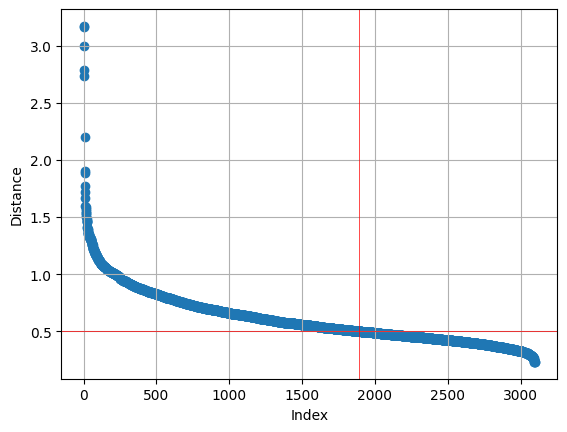

In [15]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid()
plt.show()

## Exploring Epislon values

In [16]:
#testing values between 1.0 and 1.5
np.arange(1.0,1.5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4])

In [17]:
models = {}

for value in np.arange(1.0,1.5,0.1):
    model = DBSCAN(eps=value, min_samples=10) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

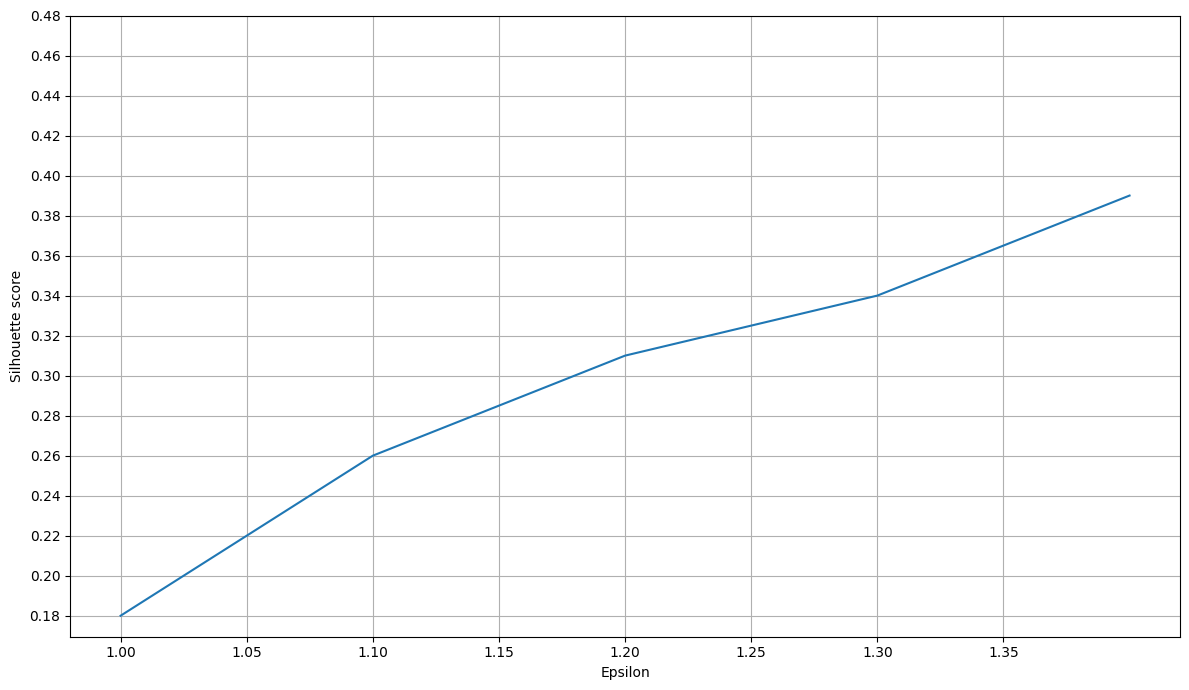

In [18]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(1.0,1.5,0.1)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.05))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
scaler = StandardScaler()
scaler.fit(features)
X_scaled_np = scaler.transform(features)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=features.columns)

model = DBSCAN(eps = 1.1, min_samples=10) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
yhat = model.fit_predict(X_scaled_df)

In [20]:
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [21]:
features['DBSCAN_cluster'] = yhat

/var/folders/4v/8q8s246j5t5_2qhs0c6ssd2m0000gn/T/ipykernel_22954/3993951070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['DBSCAN_cluster'] = yhat


In [22]:
features

,danceability,energy,acousticness,instrumentalness,tempo,cluster,DBSCAN_cluster
0,0.511,0.5320,0.169000,0.000000,137.827,0,0
1,0.517,0.6750,0.459000,0.000000,203.853,-1,1
2,0.712,0.6030,0.186000,0.000000,97.994,0,0
3,0.801,0.8060,0.382000,0.000669,106.999,-1,1
4,0.707,0.6810,0.063200,0.000005,117.999,0,0
...,...,...,...,...,...,...,...
3092,0.395,0.0533,0.975000,0.960000,115.798,1,3
3093,0.444,0.4170,0.826000,0.906000,96.696,1,3
3094,0.551,0.6570,0.251000,0.000000,85.255,0,0
3095,0.692,0.9440,0.000801,0.008070,108.002,0,0


The first `cluster` column was the initial cluster, the second cluster column `DBSCAN_cluster` is the clustering after the epsilon tuning.

# KMEANS

## Getting data

In [23]:
all_songs2 = pd.read_csv('all_songs.csv')

In [24]:
features2 = all_songs2[['danceability', 'energy', 'acousticness', 'instrumentalness', 'tempo']]

## Scaling features

In [26]:
import pickle

scaler =StandardScaler()
scaler.fit(features2)
features2_scaled =scaler.transform(features2)

with open("kmeans_scaler.pickle", "wb") as file:
        pickle.dump(scaler,file)
        
features2_scaled_df = pd.DataFrame(features2_scaled, columns = features2.columns)

## Training models to see determine how many clusters are optimal

Training a K-Means model with 5 clusters!

Training a K-Means model with 6 clusters!

Training a K-Means model with 7 clusters!

Training a K-Means model with 8 clusters!

Training a K-Means model with 9 clusters!

Training a K-Means model with 10 clusters!

Training a K-Means model with 11 clusters!

Training a K-Means model with 12 clusters!

Training a K-Means model with 13 clusters!

Training a K-Means model with 14 clusters!

Training a K-Means model with 15 clusters!

Training a K-Means model with 16 clusters!

Training a K-Means model with 17 clusters!

Training a K-Means model with 18 clusters!

Training a K-Means model with 19 clusters!



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

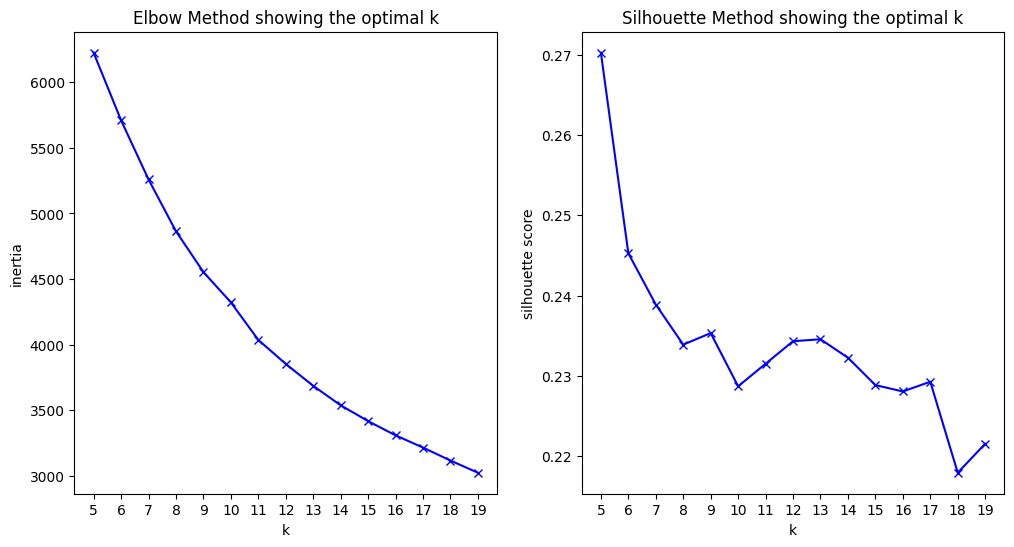

In [29]:
K = range(5, 20)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters!".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   n_init=10) # can set verbose=1 for info
    kmeans.fit(features2_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features2_scaled_df, kmeans.predict(features2_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

We decided to use the KMEANS model with 13 clusters.